In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
'''
from proteus.matrix import tseries as ts
from proteus.predic import stacked2stage
from proteus.predic import prediction
from proteus.predic import predlib
from proteus.predic import betacluster as bc
from proteus.visu import matrix as visu
'''
from proteus.predic import sbp
#from proteus.predic import fselection as fselect
import pandas as pd
import scipy.io
from os import listdir
import cPickle as pickle
from sklearn.utils import shuffle
from sklearn import preprocessing

from proteus.predic import clustering as cls
from proteus.predic import stability
from nilearn import plotting
import hcp
from proteus.io import util

/home/cdansereau/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/cdansereau/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/cdansereau/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
:0: FutureWarning: IPython widgets are exper

In [2]:
import nibabel as nib

template_007= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')

template_012= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale012.nii.gz')
template_020= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale020.nii.gz')


In [16]:
ls /home/cdansereau/data/sbp/sz_6sites_preproc/fmri/

fmri_A00036107_session1_run1.mnc     fmri_HC10527_session1_run7.mnc
fmri_A00036128_session1_run1.mnc     fmri_HC10530_session1_run7.mnc
fmri_A00036129_session1_run1.mnc     fmri_HC10557_session1_run7.mnc
fmri_A00036131_session1_run1.mnc     fmri_HC10624_session1_run7.mnc
fmri_A00036133_session1_run1.mnc     fmri_HC10629_session1_run7.mnc
fmri_A00036135_session1_run2.mnc     fmri_HC10631_session1_run7.mnc
fmri_A00036136_session1_run1.mnc     fmri_HC10697_session1_run7.mnc
fmri_A00036138_session1_run2.mnc     fmri_HC10704_session1_run7.mnc
fmri_A00036157_session1_run1.mnc     fmri_HC10708_session1_run7.mnc
fmri_A00036162_session1_run1.mnc     fmri_HC10746_session1_run7.mnc
fmri_A00036169_session1_run1.mnc     fmri_HC10779_session1_run7.mnc
fmri_A00036170_session1_run1.mnc     fmri_HC10844_session1_run7.mnc
fmri_A00036171_session1_run1.mnc     fmri_HC10855_session1_run7.mnc
fmri_A00036182_session1_run2.mnc     fmri_HC10871_session1_run7.mnc
fmri_A00036185_session1_run1.mnc     fmri_HC1087

In [3]:
import glob,os
import nibabel as nib
base_path = '/home/cdansereau/data/sbp/sz_6sites_preproc/fmri_nii/'
list_of_files = glob.glob(base_path+"*")

demog = pd.read_csv('/home/cdansereau/data/schizo/schizo_6_new_studies_20170516_matched.csv', index_col=0)
demog.index = demog.index.str.strip()
demog.columns = demog.columns.str.strip()
#print list_of_files

In [4]:
list_of_files = [glob.glob(base_path+"fmri_"+demog.index.values[ii]+"*")[0] for ii in range(demog.shape[0])]
demog['paths'] = list_of_files

In [72]:
demog

,sz,age,sex,rFD1,vols,study,path
hc0040013,0,34,1,0.18,137,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040014,0,31,1,0.30,79,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040018,0,47,1,0.20,116,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040019,0,44,1,0.20,124,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040020,0,22,1,0.21,120,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040023,0,48,1,0.17,129,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040027,0,48,1,0.24,124,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040035,0,30,1,0.22,120,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040036,0,26,1,0.19,150,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...
hc0040043,0,38,1,0.22,145,1,/home/cdansereau/data/sbp/sz_6sites_preproc/fm...


# convert images in rmaps

In [77]:
from proteus.io import sbp_util
reload(sbp_util)


#multiprocess=True
list_rmaps = sbp_util.compute_seed_map(template_007,template_007.get_data()>0,demog['paths'].values,demog.index.values,'/home/cdansereau/data/sbp/sz_6sites_preproc/cambridge7_vox_blur/',multiprocess=False, dynamic=False)

Compute seed maps ...
382/382 [==============================] - 2651s  


In [ ]:

#multiprocess=True
list_rmaps = sbp_util.compute_seed_map(template_012,template_012.get_data()>0,demog['paths'].values,demog.index.values,'/home/cdansereau/data/sbp/sz_6sites_preproc/cambridge12_vox_blur/',multiprocess=False, dynamic=False)

Compute seed maps ...
382/382 [==============================] - 2866s  


In [121]:

#multiprocess=True
list_rmaps = sbp_util.compute_seed_map(template_020,template_020.get_data()>0,demog['paths'].values,demog.index.values,'/home/cdansereau/data/sbp/sz_6sites_preproc/cambridge20_vox_blur/',multiprocess=False, dynamic=False)

Compute seed maps ...
382/382 [==============================] - 3163s  


In [78]:
ls /home/cdansereau/data/sbp/sz_6sites_preproc/cambridge7_vox_blur/

fmri_A00036107_7_vox_dynamic.h5  fmri_HC10527_7_vox_dynamic.h5
fmri_A00036128_7_vox_dynamic.h5  fmri_HC10530_7_vox_dynamic.h5
fmri_A00036129_7_vox_dynamic.h5  fmri_HC10557_7_vox_dynamic.h5
fmri_A00036131_7_vox_dynamic.h5  fmri_HC10624_7_vox_dynamic.h5
fmri_A00036133_7_vox_dynamic.h5  fmri_HC10629_7_vox_dynamic.h5
fmri_A00036135_7_vox_dynamic.h5  fmri_HC10631_7_vox_dynamic.h5
fmri_A00036136_7_vox_dynamic.h5  fmri_HC10697_7_vox_dynamic.h5
fmri_A00036138_7_vox_dynamic.h5  fmri_HC10704_7_vox_dynamic.h5
fmri_A00036157_7_vox_dynamic.h5  fmri_HC10708_7_vox_dynamic.h5
fmri_A00036162_7_vox_dynamic.h5  fmri_HC10746_7_vox_dynamic.h5
fmri_A00036169_7_vox_dynamic.h5  fmri_HC10779_7_vox_dynamic.h5
fmri_A00036170_7_vox_dynamic.h5  fmri_HC10844_7_vox_dynamic.h5
fmri_A00036171_7_vox_dynamic.h5  fmri_HC10855_7_vox_dynamic.h5
fmri_A00036182_7_vox_dynamic.h5  fmri_HC10871_7_vox_dynamic.h5
fmri_A00036185_7_vox_dynamic.h5  fmri_HC10877_7_vox_dynamic.h5
fmri_A00036188_7_vox_dynamic.h5  fmri_HC10893_7_vox_dyn

In [86]:
demog[['sz']].values.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1,

In [117]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/sbp_res_st3_2st3.pkl', "rb"))

In [23]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/sbp_res_cam20_split50_st3_2st3.pkl', "rb"))


In [186]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/sbp_res_cam20_split80_st3_2st3.pkl', "rb"))


In [174]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/sbp_res_cam20_split50_recurrent_thres10pct_65mingamma_st3_2st3.pkl', "rb"))


In [224]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/connectomes_scale20_split20_recurrent_thres05pct_st3_2st3.pkl', "rb"))


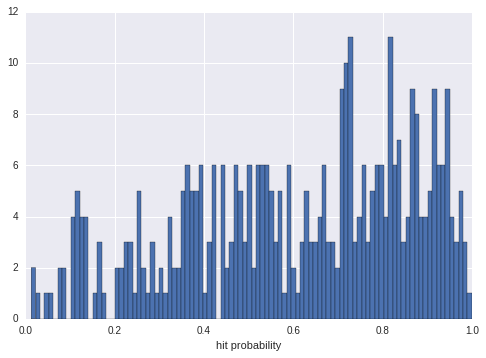

In [6]:
sbp_ = dat_res['sbp']

plt.hist(sbp_.tlp.training_hit_probability,100)
plt.xlabel('hit probability')

In [198]:
sbp_.tlp.hitproba

In [182]:
sbp_ = dat_res['sbp']

mask_sz = dat_res['scores'][:,0]>0
plt.figure()
plt.hist(sbp_.tlp.training_hit_probability[~mask_sz],20)
plt.xlabel('hit probability CN')
plt.figure()
plt.hist(sbp_.tlp.training_hit_probability[mask_sz],20)
plt.xlabel('hit probability SZ')

KeyError: 'sbp'

In [9]:
dat_res['scores'][:]

(382, 9)

In [157]:
(sbp_.tlp.training_hit_probability>0.9).sum()

51

In [183]:
dat_res['scores'][:,0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1

In [92]:
demog['sz'].values*1.


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [93]:
demog.shape

(382, 6)

In [87]:
demog = pd.read_csv('/home/cdansereau/data/schizo/schizo_6_new_studies_20170516_matched.csv', index_col=0)
demog.index = demog.index.str.strip()
demog.columns = demog.columns.str.strip()

In [163]:
from proteus.visu import sbp_visu
sbp_visu.classif_repo(dat_res['scores'][:,0],dat_res['scores'][:,1]>0,dat_res['scores'][:,2])

##################################################################
Main
             precision    recall  f1-score   support

        0.0       0.51      0.45      0.48       191
        1.0       0.51      0.57      0.54       191

avg / total       0.51      0.51      0.51       382

ACC: 0.510471204188
Right:
             precision    recall  f1-score   support

        0.0       0.81      0.74      0.77        53
        1.0       0.70      0.78      0.74        41

avg / total       0.76      0.76      0.76        94

ACC: 0.755319148936
Left:
             precision    recall  f1-score   support

        0.0       0.39      0.34      0.36       138
        1.0       0.46      0.51      0.48       150

avg / total       0.43      0.43      0.43       288

ACC: 0.430555555556
##################################################################


In [29]:

sbp_visu.classif_repo(dat_res['scores'][:,0],dat_res['scores'][:,1]>0,dat_res['scores'][:,4])

##################################################################
Main
             precision    recall  f1-score   support

        0.0       0.64      0.63      0.64       191
        1.0       0.64      0.64      0.64       191

avg / total       0.64      0.64      0.64       382

ACC: 0.638743455497
Right:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         2
        1.0       0.83      1.00      0.91        10

avg / total       0.69      0.83      0.76        12

ACC: 0.833333333333
Left:
             precision    recall  f1-score   support

        0.0       0.64      0.64      0.64       189
        1.0       0.62      0.62      0.62       181

avg / total       0.63      0.63      0.63       370

ACC: 0.632432432432
##################################################################


In [281]:
dat_res = pickle.load(open('/home/cdansereau/data/sbp/sz_6sites_preproc/results_sz_fmri/connectomes_scale7_split20_recurrent_thres10pct_st3_2st3.pkl', "rb"))


In [282]:
rec = 4
sbp_visu.classif_repo(dat_res['scores'][:,0],dat_res['scores'][:,rec]>0,dat_res['scores'][:,rec])

##################################################################
Main
             precision    recall  f1-score   support

        0.0       0.52      0.80      0.63       191
        1.0       0.55      0.25      0.34       191

avg / total       0.53      0.52      0.48       382

ACC: 0.523560209424
Right:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        38
        1.0       0.55      1.00      0.71        47

avg / total       0.31      0.55      0.39        85

ACC: 0.552941176471
Left:
             precision    recall  f1-score   support

        0.0       0.52      1.00      0.68       153
        1.0       0.00      0.00      0.00       144

avg / total       0.27      0.52      0.35       297

ACC: 0.515151515152
##################################################################


In [100]:
dat_res['scores'].shape

(382, 16)

In [159]:
from scipy.io import loadmat
connectomes = []
for id_subj in demog.index.values:
    dat = loadmat('/home/cdansereau/data/sbp/sz_6sites_preproc/corrmatrix/corrmatrix_64'+id_subj+'.mat')
    connectomes.append(dat['R'])
connectomes = np.hstack(connectomes).T

In [134]:
dat_res['scores'].shape

(382, 7)

In [146]:
dat_res['scores'][dat_res['scores'][:,4]>0][:,[0,1,4]]

array([[ 0.        ,  1.10595969,  2.93017904],
       [ 1.        ,  0.99175825,  1.64878628],
       [ 1.        ,  0.26902246,  1.82766044],
       [ 1.        ,  0.7846148 ,  1.51718434],
       [ 1.        ,  1.76214247,  7.48292636],
       [ 1.        ,  0.15935967,  3.29828074],
       [ 1.        ,  0.49349676,  1.26595188],
       [ 1.        ,  1.1698482 ,  0.69243208],
       [ 1.        ,  1.22920237,  1.1653258 ],
       [ 1.        ,  0.67076773,  0.03494453],
       [ 1.        ,  0.91175082,  5.31359278],
       [ 1.        ,  1.53839551,  2.85637858],
       [ 1.        ,  0.51322753,  2.78084671],
       [ 1.        ,  0.61101973,  1.39228117],
       [ 1.        ,  0.9971203 ,  2.21920116],
       [ 1.        ,  0.91124736,  1.09939836],
       [ 1.        ,  0.69543881,  0.76803483],
       [ 1.        ,  0.87604068,  1.13472037],
       [ 1.        ,  1.84465819,  4.39960449],
       [ 1.        ,  1.37059368,  4.72247967],
       [ 1.        ,  0.54863918,  0.145